In [110]:
from qiskit import *
from qiskit_aer import * 
from qiskit.visualization import plot_histogram, array_to_latex, plot_bloch_multivector
%matplotlib inline

In [111]:
circuit = QuantumCircuit(2) # Create a quantum circuit with 2 qubits
circuit.h(0)                # Apply a Hadamard gate to the first qubit 
circuit.measure_all()       # Measure both qubits 

{'00': 511, '01': 513}


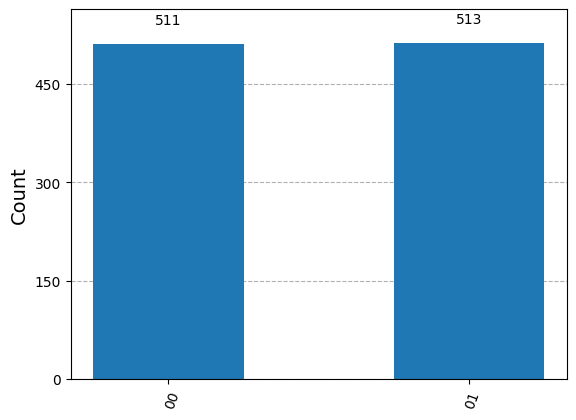

In [112]:
# Run simulation, measure results, and plot

simulator = AerSimulator()                              # Create an Aer simulator 
compiled_circuit = transpile(circuit, simulator)        # Transpile (optimize) the circuit for the hardware 
sim_result = simulator.run(compiled_circuit).result()   # Run the simulation and retrieve the result

plot_histogram(sim_result.get_counts())
print(sim_result.get_counts())

### What happened? 
The first qubit has an equal probability of being **0** or **1** because it was in superposition.
<br>
The Hadamard gate was not applied to the second qubit, so it will remain in the **0** state.
<br>
<br>
The possible final states of this system are **00** and **01** with equal probabilities.
<br>
The states **11** and **10** have no probability of occuring in this system.

In [113]:
# Re-create the quantum circuit without measuring for visualization 
circuit = QuantumCircuit(2)
circuit.h(0)

### Exercise:
Uncomment the next cell to measure all the qubits, then run all cells a few times.
<br>
Take note of the Bloch spheres after each run. 
<br>
Notice how the first qubit can change depending on the results of the simulation, while the second qubit is always 0. 

In [114]:
# circuit.measure_all()

In [115]:
simulator = StatevectorSimulator()              # Create a state vector simulator 
sim_result = simulator.run(circuit).result()    # Run the simulator and retrieve the result 
state_vector = sim_result.get_statevector()     # Retrieve the state vector

# Print the state vector with latex formatting 
array_to_latex(state_vector)

<IPython.core.display.Latex object>

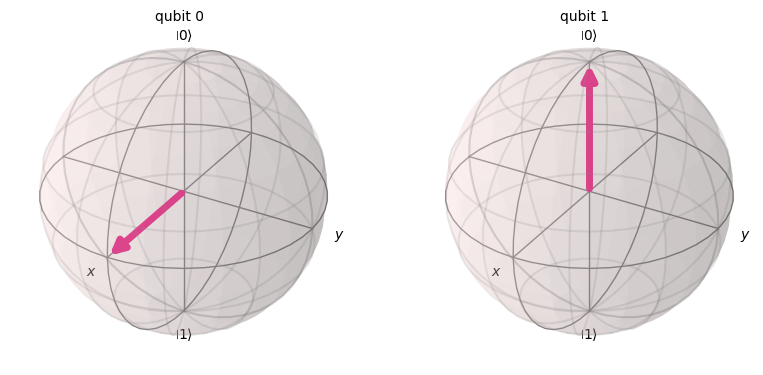

In [116]:
# Visualize the state vector in a Bloch sphere
plot_bloch_multivector(state_vector);# Create an instruction set to run on the simulator 